## Time Series Analysis

### Intialization and Libraries

In [1]:
from statsmodels.tsa.api import ExponentialSmoothing
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
data = pd.read_csv('intern_project.csv')

### Given extracted CSV File

In [ ]:
data

,ELCOT PO DATE,Total Value
0,13/3/2017,"505,751.00"
1,11/5/2017,"125,322.00"
2,19/5/2017,"1,163,392.00"
3,30/6/2017,"148,486.00"
4,8/2/2018,"2,586,544.00"
...,...,...
176,16/5/2023,"69,054.00"
177,16/5/2023,"196,258.00"
178,16/5/2023,"105,398.00"
179,16/5/2023,"148,876.00"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ELCOT PO DATE  181 non-null    object
 1    Total Value   181 non-null    object
dtypes: object(2)
memory usage: 3.0+ KB


In [ ]:
data.describe().T

,count,unique,top,freq
ELCOT PO DATE,181,88,16/5/2023,13
Total Value,181,172,"387,552.00",4


In [ ]:
data.shape

(181, 2)

In [ ]:
data.columns

Index(['ELCOT PO DATE', ' Total Value '], dtype='object')

### converting the string into integer in the \'Total Value\'

In [ ]:
#converting the string into integer in the \'Total Value\' 

total_value = np.array(data[' Total Value '])
l = []
for i in total_value:
    
    def number(i)->int:
        c = 0
        for k in range(len(i)):
            if i[k] == '.':
                break
            if i[k] == ' ':
                continue
            if i[k] >= '0' and i[k] <= '9':
                c = c * 10 + (ord(i[k]) - 48)
        return c
    
    check = number(i)
    l.append(check)
    
#print(*l,sep='\n')

### Total Value List and Date inserted into Data Frame

In [ ]:
#print(type(A))
D = pd.DataFrame({'Date':data['ELCOT PO DATE'], 'Value':l})
type(D)

pandas.core.frame.DataFrame

### Creating New CSV File

In [ ]:
D.to_csv('mlcreate_csv.csv',index=False)

df = pd.read_csv('mlcreate_csv.csv')

### Created New CSV File use for Time Series Analysis

In [ ]:
#file name : csv_df
print(df.head())
print()
print(df.tail())

        Date    Value
0  13/3/2017   505751
1  11/5/2017   125322
2  19/5/2017  1163392
3  30/6/2017   148486
4   8/2/2018  2586544

          Date   Value
176  16/5/2023   69054
177  16/5/2023  196258
178  16/5/2023  105398
179  16/5/2023  148876
180  16/6/2023  617810


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    181 non-null    object
 1   Value   181 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Value,181.0,1.055930e+06,1.253377e+06,566.0,240271.0,669749.0,1196827.0,6933268.0


In [ ]:
df.index = df['Date']
del df['Date']
print(df.head())

             Value
Date              
13/3/2017   505751
11/5/2017   125322
19/5/2017  1163392
30/6/2017   148486
8/2/2018   2586544


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181 entries, 13/3/2017 to 16/6/2023
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Value   181 non-null    int64
dtypes: int64(1)
memory usage: 2.8+ KB


In [ ]:
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

In [ ]:
model = ExponentialSmoothing(train_data['Value'], seasonal='additive', seasonal_periods=12)
fitted_model = model.fit()

In [ ]:
forecast_periods = len(test_data)
forecast_values = fitted_model.forecast(forecast_periods)

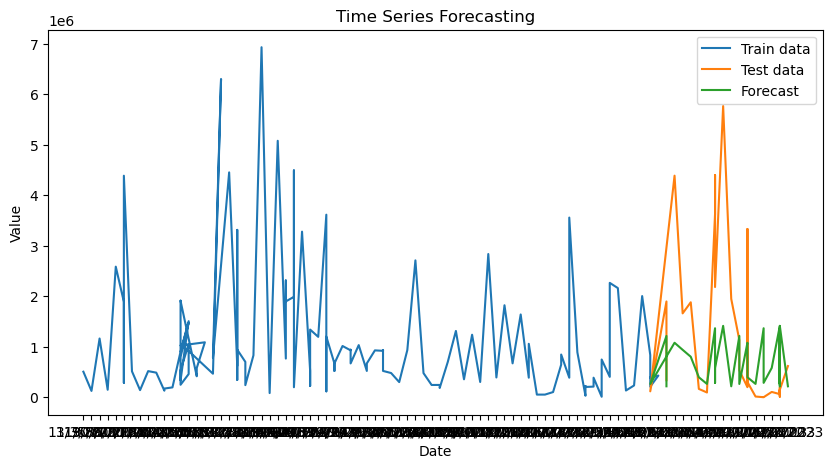

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(train_data.index, train_data['Value'], label='Train data')
plt.plot(test_data.index, test_data['Value'], label='Test data')
plt.plot(test_data.index, forecast_values, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Forecasting')
plt.legend()
plt.show()